In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from arch import arch_model

In [75]:
mpl.rcParams["figure.figsize"] = [10, 5]

In [130]:
vix = pd.read_csv("data/vix.csv", usecols=(0,5), index_col=0, parse_dates=[0], na_values="null", dtype=np.float32)
vix = 100* vix.pct_change().dropna()

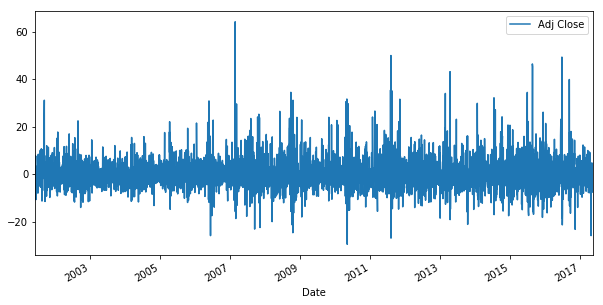

In [131]:
vix.plot()
plt.show()

In [132]:
am = arch_model(vix)

In [133]:
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     37,   Neg. LLF: 13184.7316272495
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 13184.420267396537
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9


In [134]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -13184.4
Distribution:                  Normal   AIC:                           26376.8
Method:            Maximum Likelihood   BIC:                           26402.0
                                        No. Observations:                 4004
Date:                Sat, Jul 22 2017   Df Residuals:                     4000
Time:                        22:07:24   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1412  9.577e-02      1.475      0.140 [-4.647e-02,  0.329]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.1006      1.377      2.978  2.897e-03   [  1.402,  6.799]
alpha[1]       0.1172  2.380e-02      4.927  8.369e-07 [7.060e-02,  0.164]
beta[1]        0.8000  4.225e-02     18.936  5.769e-80   [  0.717,  0.883]
==========================================================================

Covariance estimator: robust
"""

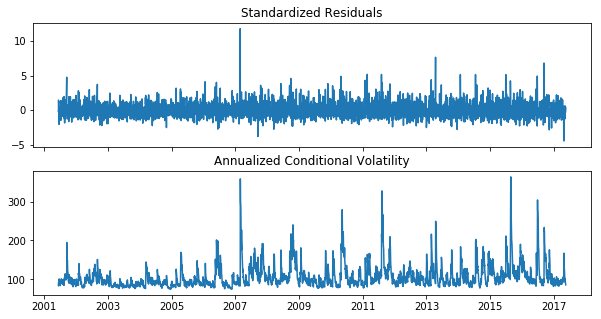

In [135]:
res.plot(annualize="D")
plt.show()

In [136]:
forecasts = res.forecast(horizon=5, method='simulation')

In [137]:
forecasts.variance.tail()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2017-05-10,NaN,NaN,NaN,NaN,NaN
2017-05-11,NaN,NaN,NaN,NaN,NaN
2017-05-12,NaN,NaN,NaN,NaN,NaN
2017-05-15,NaN,NaN,NaN,NaN,NaN
2017-05-16,28.038693,29.881232,31.288303,32.886916,34.296396
